In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Removing long warning message texts.
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing data
df = sns.load_dataset('tips')

In [3]:
# df = sns.load_dataset('tips')
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


# Data cleaning and preparation
Plan:
* Check for structure, data types and rectify.
* Check and deal with mising values.
* Check for and deal with duplicates.
*  Check and remove ourtliers.

In [4]:
#Data types
print(df.info())
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

The data set has 244 entries, with 7 variables well labeled; 3 numerical variables and 4 categorical variables.

In [5]:
#Check and deal with mising values
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

There are no missing values in all the 244 entries of the dataset.

In [6]:
#Check for and deal with duplicates
dups = df.duplicated()
dups.value_counts()

False    243
True       1
Name: count, dtype: int64

In [7]:
#Removing the one duplicate found
df_cleaned = df.drop_duplicates()

#change the ncolumn name sex to gender
df_cleaned = df_cleaned.rename(columns={'sex': 'gender'})

One duplicate was found in the dataset and removed, leaving behind 243 entries. Due to the non existence of unique identifying variables, no further search for duplicates basing on particular columns will be done.

# EDA

In [8]:
aggregates1 = df_cleaned.describe()
aggregates1

,total_bill,tip,size
count,243.000000,243.000000,243.000000
mean,19.813868,3.002387,2.572016
std,8.910071,1.385002,0.952356
min,3.070000,1.000000,1.000000
25%,13.380000,2.000000,2.000000
50%,17.810000,2.920000,2.000000
75%,24.175000,3.575000,3.000000
max,50.810000,10.000000,6.000000


Total bill and tip have relatively larger max values as compared to their mean values, indicating the possibility of outliers. However for the this data analysis, they may be relevant to illustrate the possible extremes i.e.

* Once in a while, there are abnormally large tips that occur together with the large bills.

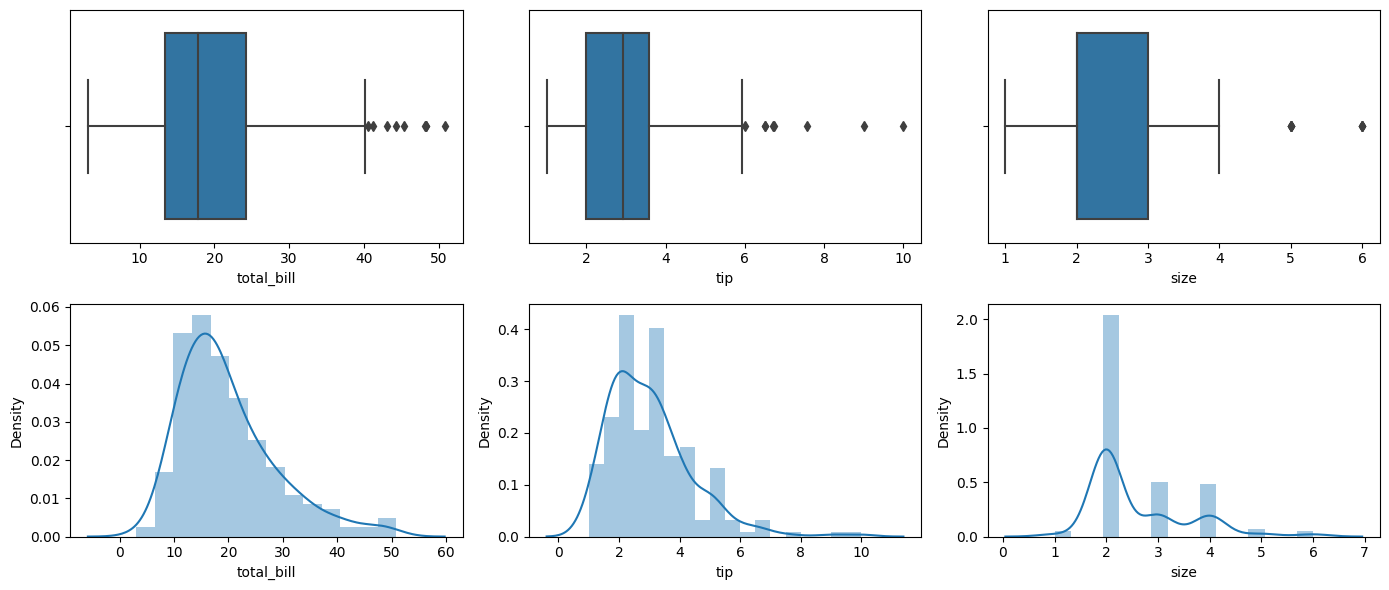

In [9]:
#Investigating with plots
plt.figure(figsize=(14,6))
plt.subplot(2,3,1)
sns.boxplot(data=df_cleaned, x='total_bill')

plt.subplot(2,3,2)
sns.boxplot(data=df_cleaned, x='tip')

plt.subplot(2,3,3)
sns.boxplot(data=df_cleaned, x='size')

plt.subplot(2,3,4)
sns.distplot(df_cleaned['total_bill'])

plt.subplot(2,3,5)
sns.distplot(df_cleaned['tip'])

plt.subplot(2,3,6)
sns.distplot(df_cleaned['size'])

plt.tight_layout()
plt.savefig('Distributions of total bill,tip and size.png')
plt.show()

A large amount of the bills fall within the 10 to 40 mark and 1 to 3 for tips.

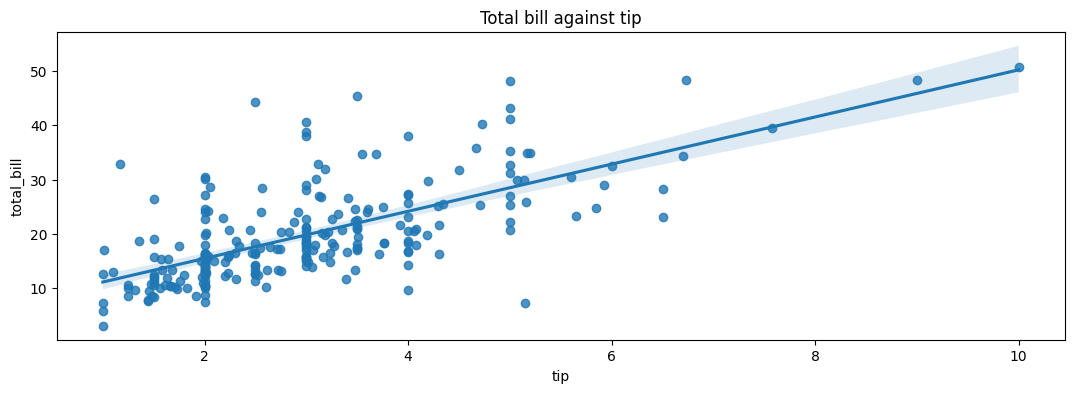

In [10]:
# Realtionship between total bill and tip
plt.figure(figsize = (13,4))
sns.regplot(data = df_cleaned, x = 'tip', y = 'total_bill')
plt.title('Total bill against tip')
plt.savefig('Total Bill against tip.png')
plt.show()

In [11]:
tip_ratio = df_cleaned.tip / df_cleaned.total_bill
mean_tip_ratio = np.mean(tip_ratio) * 100
df_cleaned['tip_ratio'] = tip_ratio
print(mean_tip_ratio)

16.083120899771608


According to the regression plot, the tip size is directly correlated to total bill, in other words, total bill increases with tip size.

On average, the ratio of tips to total bill is approximately 16% meaning for ever 1 unit of total bill, the tip recieved would be 0.16.

# Part 1: Which types of customers tip more generously?

gender
Male      3.089618
Female    2.843140
Name: tip, dtype: float64
smoker
Yes    3.019674
No     2.991854
Name: tip, dtype: float64


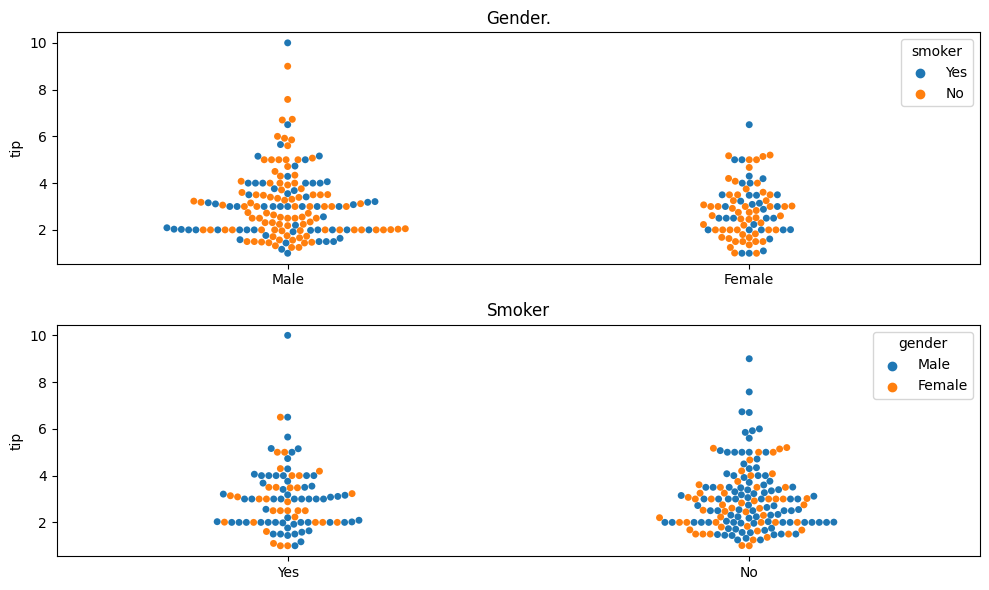

In [12]:
# Gender and smoking influence on tipping
gender_averages = df_cleaned.groupby('gender')['tip'].mean()
smoker_averages = df_cleaned.groupby('smoker')['tip'].mean()
print(gender_averages)
print(smoker_averages)

#Plots
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
sns.swarmplot(data=df_cleaned, x = 'gender', y='tip', hue =('smoker'))
plt.xlabel("")
plt.title('Gender.')

plt.subplot(2,1,2)
sns.swarmplot(data=df_cleaned, x = 'smoker', y='tip', hue =('gender'))
plt.xlabel("")
plt.title('Smoker')

plt.tight_layout()
plt.savefig('Composition of Gender and smokers')
plt.show()


Inspecting the extra large tips (outliers), It is noticable the majority are males who give an average more than the females. 
Smokers are almost the same number as non smokers although non smokers give higher tips.

# Part 2: When should the restaurant expect high or low revenue?

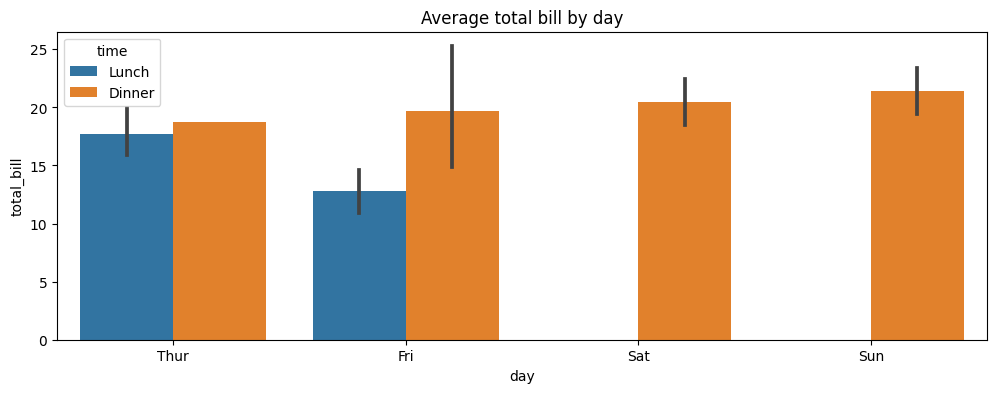

time
Lunch     17.230896
Dinner    20.797159
Name: total_bill, dtype: float64
day
Thur    17.759508
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64


In [13]:
# Best time for tip revenue
plt.figure(figsize = (12,4))
sns.barplot(data=df_cleaned, x='day', y='total_bill', hue = 'time')
plt.title("Average total bill by day")
plt.savefig('Average total bill by day.png')
plt.show()

#Average total bills by day and time
time_averages = df_cleaned.groupby('time')['total_bill'].mean()
day_averages = df_cleaned.groupby('day')['total_bill'].mean()
print(time_averages)
print(day_averages)

According to the data, there are more revenue on a saturday and sunday (Weekend) and more lunch time revenue on a Thursday.

Also, Lunch time revenue is far higher on a Thursday thank any other day of the week. However, Dinner tips are primarily given on weekends (Saturday and Sunday) and are relatively higher than  tips given during weekdays.

# Part3: What factors most strongly influence tipping behavior?

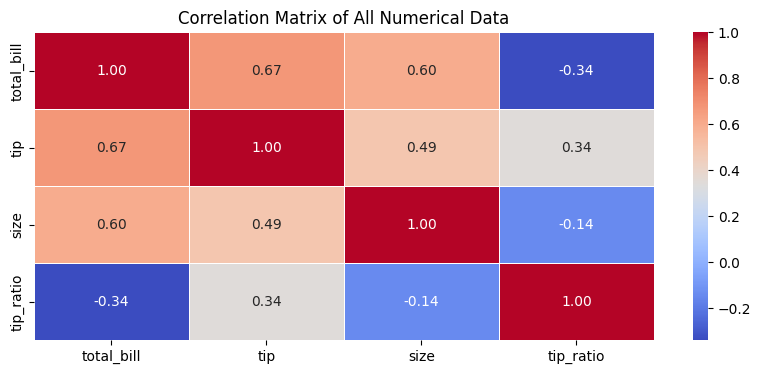

In [14]:
# Factors mostly influencing tipping behavior.
numerical_df = df_cleaned.select_dtypes(include=[np.number])
cor_mtx = numerical_df.corr()

# Correlation heatmap.
plt.figure(figsize=(10,4))
sns.heatmap(cor_mtx, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of All Numerical Data')

plt.savefig('Correlation Matrix of All Numerical Data.png')
plt.show()

The total bill has a higher correlation to tip size than the size of the party. Meaning, total bill size has more infuence on the size tip.

# Part4: Do certain days, times, or party sizes create predictable patterns?

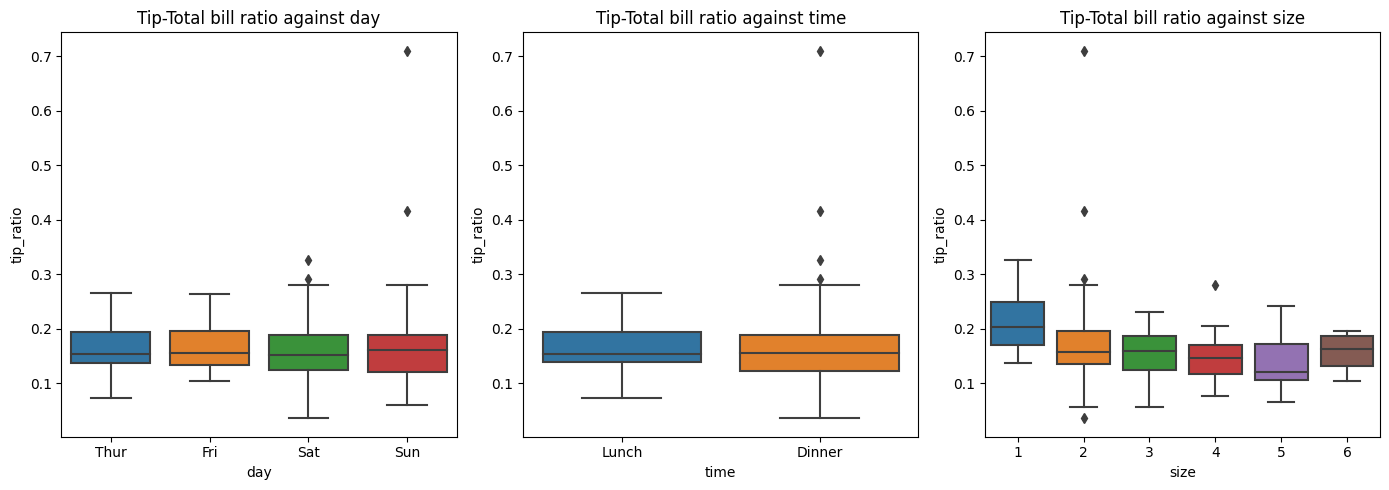

In [15]:
#Plots on tip to total bill ratio.
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
sns.boxplot(data = df_cleaned, x = 'day', y = 'tip_ratio')
plt.title("Tip-Total bill ratio against day")

plt.subplot(1,3,2)
sns.boxplot(data = df_cleaned, x = 'time', y = 'tip_ratio')
plt.title("Tip-Total bill ratio against time")

plt.subplot(1,3,3)
sns.boxplot(data = df_cleaned, x = 'size', y = 'tip_ratio')
plt.title("Tip-Total bill ratio against size")

plt.tight_layout()
plt.savefig('Tip-Total bill ratio against day, time and size.png')
plt.show()

The ratio of tips (percentage tip) is fairly the same over all days of the week although slightly higher on the weekend especially Sundays. On the weekend, there tend to be outliers where customers tipped more generously; upto 70% of their total bill.

Tipping at lunch at diner have a relatively equal average tipping percentage 15 to 20% with dinner having more generous tips in relation to the total bil. Meaning on average time does not have much effect on the tipping behaviour although dinner attracts more generousity.

Smaller parties (size 1–2) have higher average tip ratios and as party size increases, the the tip ratio decreases. This means that larger party sizes tip less on average even though their total bills may be bigger.

# Part 5: Are there differences in tipping behavior between weekends and weekdays?

# Part 6: Does party size influence not only total bill size but also tipping generosity?

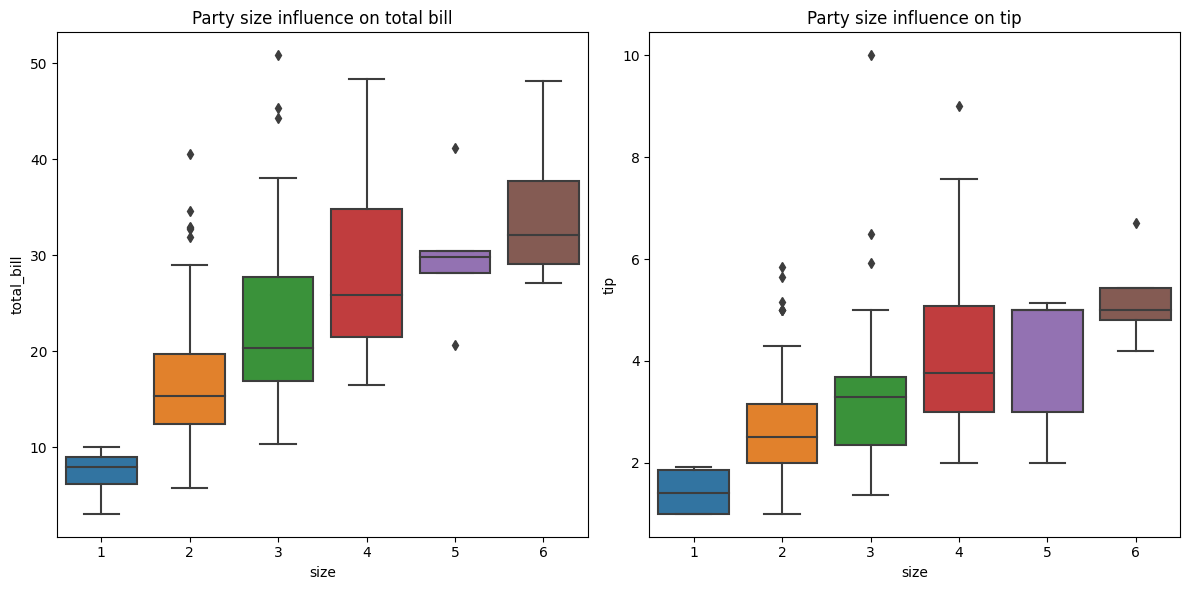

In [16]:
#Size influence on tip and total bill.
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(data = df_cleaned, x = 'size', y = 'total_bill')
plt.title("Party size influence on total bill")

plt.subplot(1,2,2)
sns.boxplot(data = df_cleaned, x = 'size', y = 'tip')
plt.title("Party size influence on tip")

plt.tight_layout()
plt.savefig('Size influence on tip and total bill.png')

The size of the party greatly influences the total bill; as bigger parties tend to have larger total_bills on average. Parties of 2 to 3 however have outliers where bills were significanly larger.

The same can be said about the tips that grow bigger with party size, this could be attributed to larger total bills attracting larger tips.

# Part 7: Are there specific combinations of factors (e.g., Saturday dinner, large parties, smokers) that consistently lead to higher revenue?

In [17]:
# Compute revenue averages of the five factors combnined that could influence tip
means = df_cleaned.groupby(['day', 'time', 'size', 'smoker','gender'])['total_bill'].mean()
means = means.sort_values(ascending=False).head(10)

In [18]:
print(means)

day   time    size  smoker  gender
Sun   Dinner  6     No      Male      48.1700
Thur  Lunch   4     Yes     Female    43.1100
              5     No      Male      41.1900
Fri   Dinner  4     Yes     Male      40.1700
Sat   Dinner  3     Yes     Female    36.2350
Thur  Lunch   6     No      Male      34.3000
Sun   Dinner  3     Yes     Male      34.2250
Sat   Dinner  4     No      Male      32.1050
              3     Yes     Male      30.7875
Sun   Dinner  5     Yes     Male      30.4600
Name: total_bill, dtype: float64


On average, a combination of Friday dinner, a large party size composed of smokers and paid by a male lead to higher revenue.

In [19]:
#Table exports
aggregates1.to_csv('aggregates.csv', index=True)
gender_averages.to_csv('gender_averages.csv', index=True)
smoker_averages.to_csv('smoker_averages.csv', index=True)
#gndr_mean.to_csv('gndr_mean.csv', index=True)
#gndr_count.to_csv('gndr_count.csv', index=True)
#smkr_mean.to_csv('smkr_mean.csv', index=True)
#smkr_count.to_csv('smkr_count.csv', index=True)
time_averages.to_csv('time_averages.csv', index=True)
day_averages.to_csv('day_averages.csv', index=True)
means.to_csv('means.csv', index=True)